In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:
df = pd.read_csv('Customer Churn (1).csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

# filling total charges blank with int 

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [5]:
df.isnull().sum()

In [6]:
df.describe()

In [12]:
df["customerID"].duplicated().sum()

np.int64(0)

#convert senior citizen 0 and 1 with no and yes

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else :
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
az = sns.countplot(x = "Churn" , data = df )
az.bar_label(az.containers[0])
plt.title("total numbers of people churn out ")
plt.show()

In [9]:
gb = df.groupby("Churn").agg({"Churn": "count"})

plt.pie(gb["Churn"], labels = gb.index , autopct = "%1.2f%%")
plt.title(" Percentage of customer churn out " )
plt.show()

In [10]:
plt.figure(figsize = [4,4])
fx = sns.countplot(x = "gender", data = df, hue = "Churn")
fx.bar_label(fx.containers[0])
plt.show()

In [11]:
plt.figure(figsize = [4,4])
fx = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
fx.bar_label(fx.containers[0])
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(4, 4))
bottom = [0] * len(percentage)

for churn_status in percentage.columns:
    bars = ax.bar(
        percentage.index,
        percentage[churn_status],
        bottom=bottom,
        label=churn_status
    )

    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label if there's a non-zero segment
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=9
            )

    bottom = bottom + percentage[churn_status]

ax.set_xlabel("Senior Citizen")
ax.set_ylabel("Percentage")
ax.set_title("Churn Percentage by Senior Citizen Status")
ax.set_ylim(0, 100)
ax.legend(title="Churn")
plt.tight_layout()
plt.show()


#compraed a greater no of senior citizen have churned

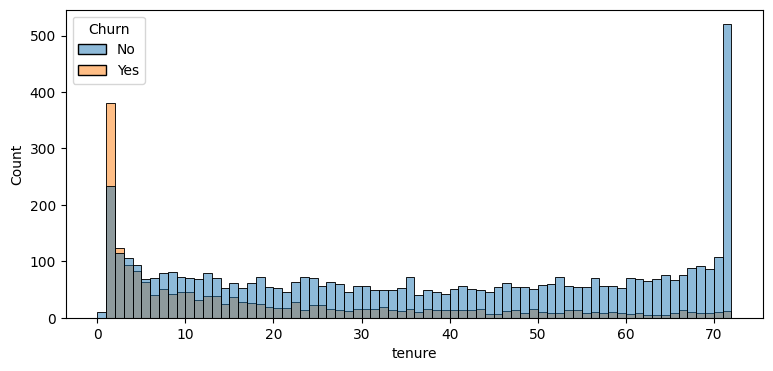

In [36]:
plt.figure(figsize = [9,4])
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn" )
plt.show()

#people who have used our services for longer time have stayed and people who have use our sevices for initial days have left

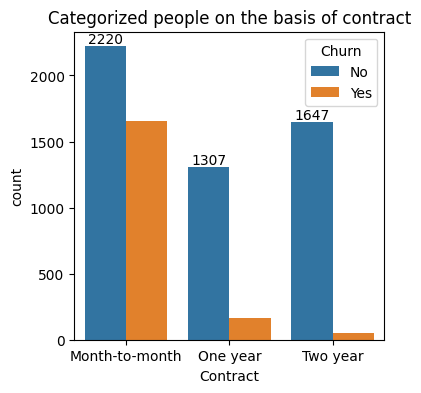

In [33]:
plt.figure(figsize = [4,4])
ax = sns.countplot(x ="Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Categorized people on the basis of contract" )
plt.show()

we can say that cutomers who have use our services month to month have churn more than those customers have chose it one year contract or two year contract 

In [43]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

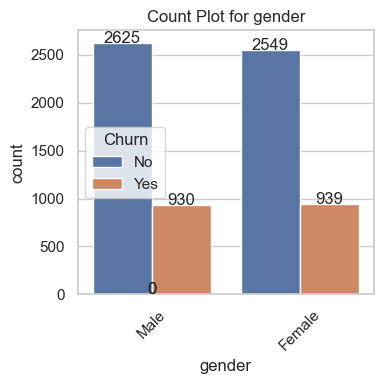

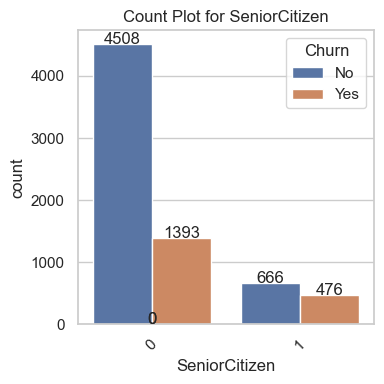

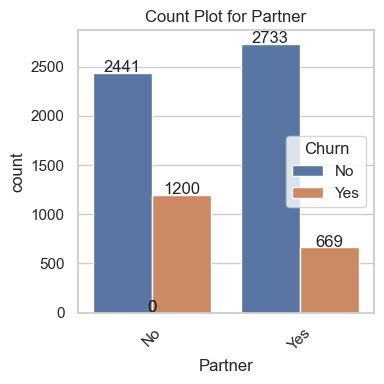

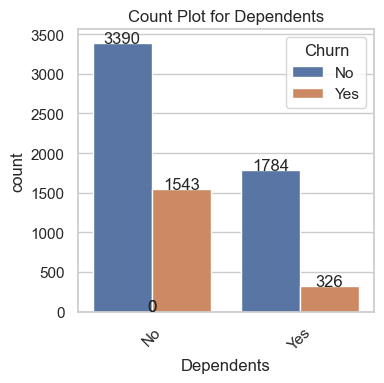

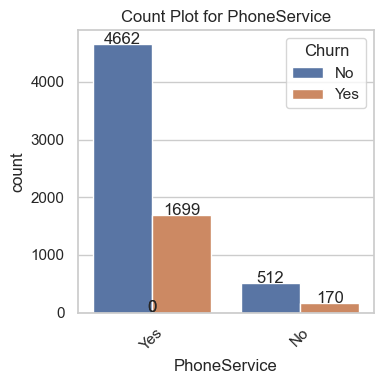

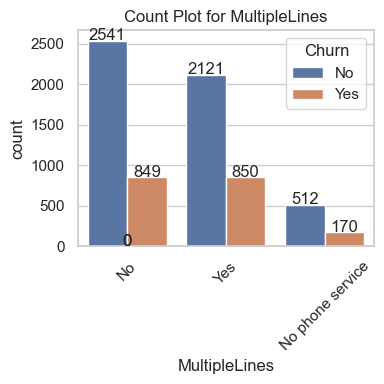

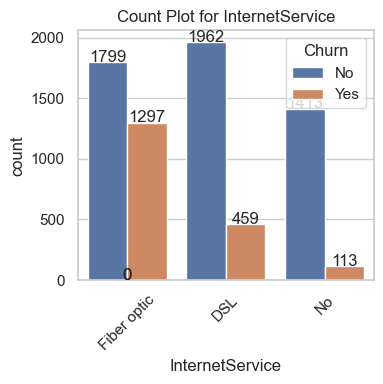

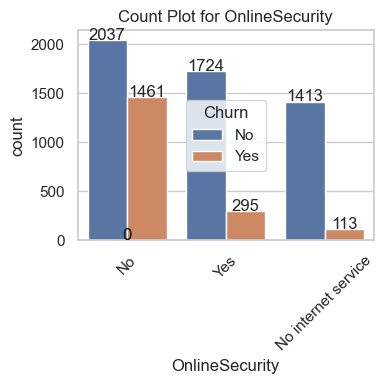

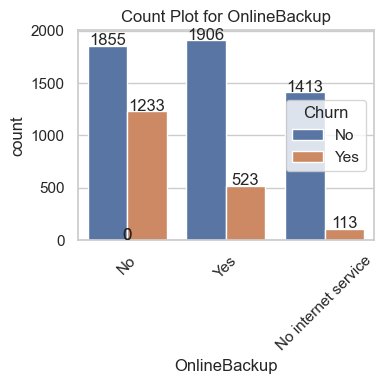

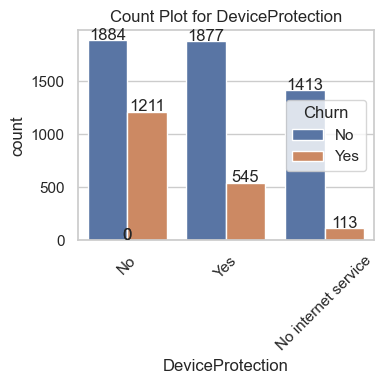

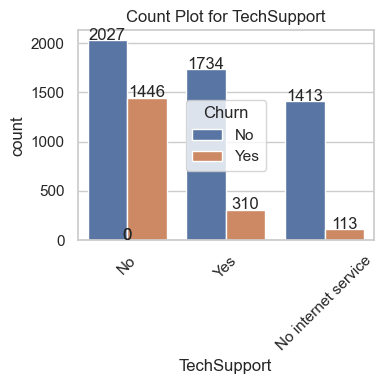

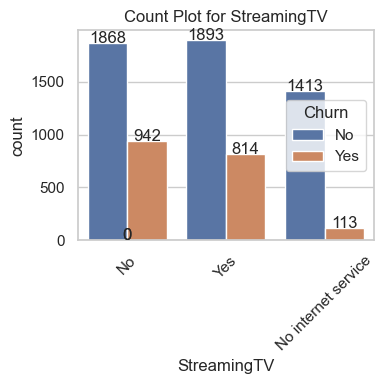

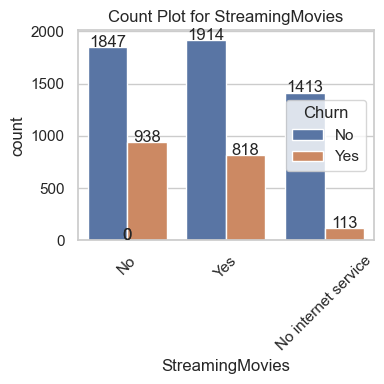

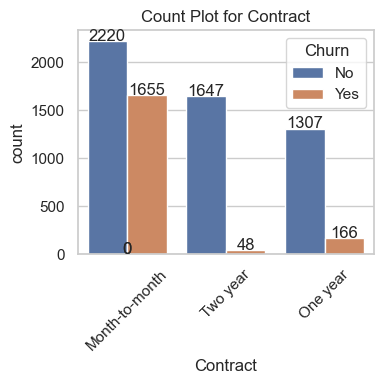

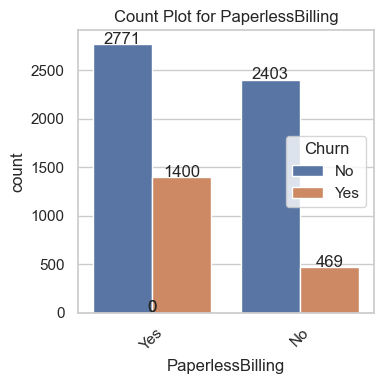

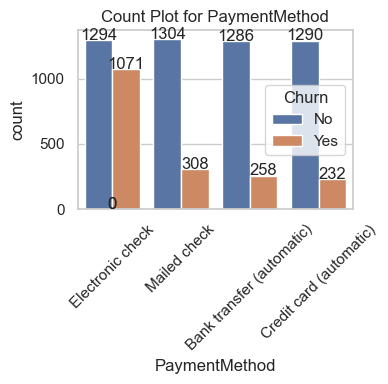

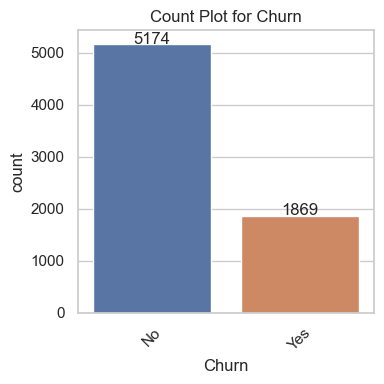

In [3]:

columns = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
           'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
           'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
           'TotalCharges', 'Churn']

exclude = ['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure']

df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

sns.set(style="whitegrid")

for col in columns:
    if col not in exclude:
        plt.figure(figsize=(4, 4))
        ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue = "Churn")
        plt.xticks(rotation=45)
        plt.title(f'Count Plot for {col}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3,
                    f'{height:.0f}', ha="center")

        plt.tight_layout()
        plt.show()


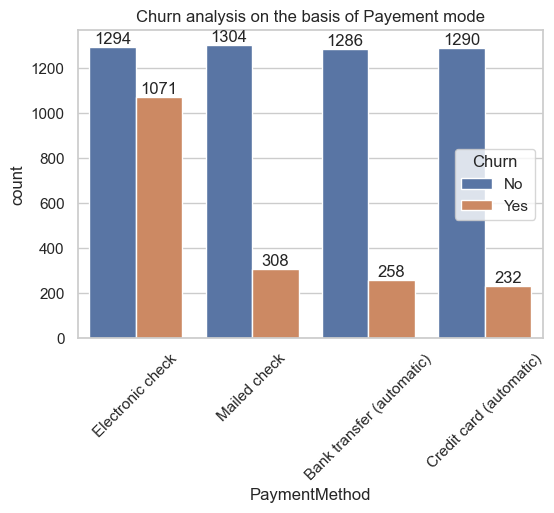

In [15]:
plt.figure(figsize = [6,4])
ax = sns.countplot(x = "PaymentMethod", data = df , hue = "Churn")
plt.title("Churn analysis on the basis of Payement mode")
plt.xticks(rotation  = 45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.show()